# Visualizing batting and hitting distribution per MLB team

As the Jays approached the ALWC, I knew we were a deep hitting team and maybe not as deep in pitching talent. So wanted to visualize all teams distributions and skew.

I take all data from mlb.com

Let's start with batting.

In [1]:
import os
data_dir = './'
batting_csv = data_dir + '/Batting Stats.csv'

In [2]:
!pip install pandas --quiet
import pandas as pd
batting_raw = pd.read_csv(batting_csv)

In [3]:
pd.set_option('display.max_columns', None)
batting_raw.head()

,last_name,first_name,player_id,year,pa,bip,ba,est_ba,est_ba_minus_ba_diff,slg,est_slg,est_slg_minus_slg_diff,woba,est_woba,est_woba_minus_woba_diff
0,Semien,Marcus,543760,2022,618,468,0.243,0.234,0.009,0.415,0.375,0.040,0.311,0.297,0.014
1,Freeman,Freddie,518692,2022,616,458,0.330,0.320,0.010,0.526,0.553,-0.027,0.396,0.409,-0.013
2,Turner,Trea,607208,2022,610,456,0.305,0.282,0.023,0.482,0.442,0.040,0.359,0.343,0.016
3,Lindor,Francisco,596019,2022,609,431,0.268,0.255,0.013,0.444,0.428,0.016,0.342,0.335,0.007
4,Olson,Matt,621566,2022,608,397,0.243,0.250,-0.007,0.477,0.456,0.021,0.345,0.344,0.001


In [4]:
batting_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   last_name                 247 non-null    object 
 1    first_name               247 non-null    object 
 2   player_id                 247 non-null    int64  
 3   year                      247 non-null    int64  
 4   pa                        247 non-null    int64  
 5   bip                       247 non-null    int64  
 6   ba                        247 non-null    float64
 7   est_ba                    247 non-null    float64
 8   est_ba_minus_ba_diff      247 non-null    float64
 9   slg                       247 non-null    float64
 10  est_slg                   247 non-null    float64
 11  est_slg_minus_slg_diff    247 non-null    float64
 12  woba                      247 non-null    float64
 13  est_woba                  247 non-null    float64
 14  est_woba_m

I need to join to a mapping of players and what teams they're on, since this data isn't in the batting_raw file

In [5]:
playerid_csv = data_dir + '/PLAYERIDMAP.csv'
playerid_df = pd.read_csv(playerid_csv)
playerid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IDPLAYER        2879 non-null   object 
 1   PLAYERNAME      2879 non-null   object 
 2   BIRTHDATE       2879 non-null   object 
 3   FIRSTNAME       2879 non-null   object 
 4   LASTNAME        2879 non-null   object 
 5   TEAM            1842 non-null   object 
 6   LG              1841 non-null   object 
 7   POS             2879 non-null   object 
 8   IDFANGRAPHS     2878 non-null   object 
 9   FANGRAPHSNAME   2879 non-null   object 
 10  MLBID           2878 non-null   float64
 11  MLBNAME         2878 non-null   object 
 12  CBSID           2822 non-null   float64
 13  CBSNAME         2824 non-null   object 
 14  RETROID         2228 non-null   object 
 15  BREFID          2877 non-null   object 
 16  NFBCID          2070 non-null   float64
 17  NFBCNAME        2874 non-null   o

In [6]:
playerid_df = playerid_df[['TEAM','LG','MLBID']]
playerid_df = playerid_df.rename(columns={'MLBID': 'player_id'})
playerid_df

,TEAM,LG,player_id
0,NaN,NaN,430911.0
1,NaN,NaN,472551.0
2,SF,NL,676265.0
3,WAS,NL,682928.0
4,NYY,AL,656061.0
...,...,...,...
2874,WAS,NL,608841.0
2875,MIA,NL,641779.0
2876,DET,AL,681481.0
2877,NYM,NL,683146.0


In [7]:
batting_df = pd.merge(batting_raw, playerid_df, on='player_id')
batting_df.head()

,last_name,first_name,player_id,year,pa,bip,ba,est_ba,est_ba_minus_ba_diff,slg,est_slg,est_slg_minus_slg_diff,woba,est_woba,est_woba_minus_woba_diff,TEAM,LG
0,Semien,Marcus,543760,2022,618,468,0.243,0.234,0.009,0.415,0.375,0.040,0.311,0.297,0.014,TEX,AL
1,Freeman,Freddie,518692,2022,616,458,0.330,0.320,0.010,0.526,0.553,-0.027,0.396,0.409,-0.013,LAD,NL
2,Turner,Trea,607208,2022,610,456,0.305,0.282,0.023,0.482,0.442,0.040,0.359,0.343,0.016,LAD,NL
3,Lindor,Francisco,596019,2022,609,431,0.268,0.255,0.013,0.444,0.428,0.016,0.342,0.335,0.007,NYM,NL
4,Olson,Matt,621566,2022,608,397,0.243,0.250,-0.007,0.477,0.456,0.021,0.345,0.344,0.001,ATL,NL


In [8]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   last_name                 248 non-null    object 
 1    first_name               248 non-null    object 
 2   player_id                 248 non-null    int64  
 3   year                      248 non-null    int64  
 4   pa                        248 non-null    int64  
 5   bip                       248 non-null    int64  
 6   ba                        248 non-null    float64
 7   est_ba                    248 non-null    float64
 8   est_ba_minus_ba_diff      248 non-null    float64
 9   slg                       248 non-null    float64
 10  est_slg                   248 non-null    float64
 11  est_slg_minus_slg_diff    248 non-null    float64
 12  woba                      248 non-null    float64
 13  est_woba                  248 non-null    float64
 14  est_woba_m

Now I want to calculate mean and standard deviation for batting statistics, so I can pin players on a team to a score of standard deviations away from the mean.

In [9]:
#calculate mean and standrad deviation for batting average and slugging
ba_mean = batting_df['ba'].mean()
ba_std = batting_df['ba'].std()
print(ba_mean, ba_std)

0.2497177419354839 0.03129293759075104


In [10]:
slg_mean = batting_df['slg'].mean()
slg_std = batting_df['slg'].std()
print(slg_mean, slg_std)

0.41115725806451614 0.06624072364772617


In [11]:
#assign each player an std score
batting_df['ba_score'] = (batting_df['ba']-ba_mean)/ba_std
batting_df['slg_score'] = (batting_df['slg']-slg_mean)/slg_std
batting_df.head()

,last_name,first_name,player_id,year,pa,bip,ba,est_ba,est_ba_minus_ba_diff,slg,est_slg,est_slg_minus_slg_diff,woba,est_woba,est_woba_minus_woba_diff,TEAM,LG,ba_score,slg_score
0,Semien,Marcus,543760,2022,618,468,0.243,0.234,0.009,0.415,0.375,0.040,0.311,0.297,0.014,TEX,AL,-0.214673,0.058012
1,Freeman,Freddie,518692,2022,616,458,0.330,0.320,0.010,0.526,0.553,-0.027,0.396,0.409,-0.013,LAD,NL,2.565507,1.733718
2,Turner,Trea,607208,2022,610,456,0.305,0.282,0.023,0.482,0.442,0.040,0.359,0.343,0.016,LAD,NL,1.766605,1.069474
3,Lindor,Francisco,596019,2022,609,431,0.268,0.255,0.013,0.444,0.428,0.016,0.342,0.335,0.007,NYM,NL,0.584230,0.495809
4,Olson,Matt,621566,2022,608,397,0.243,0.250,-0.007,0.477,0.456,0.021,0.345,0.344,0.001,ATL,NL,-0.214673,0.993992


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

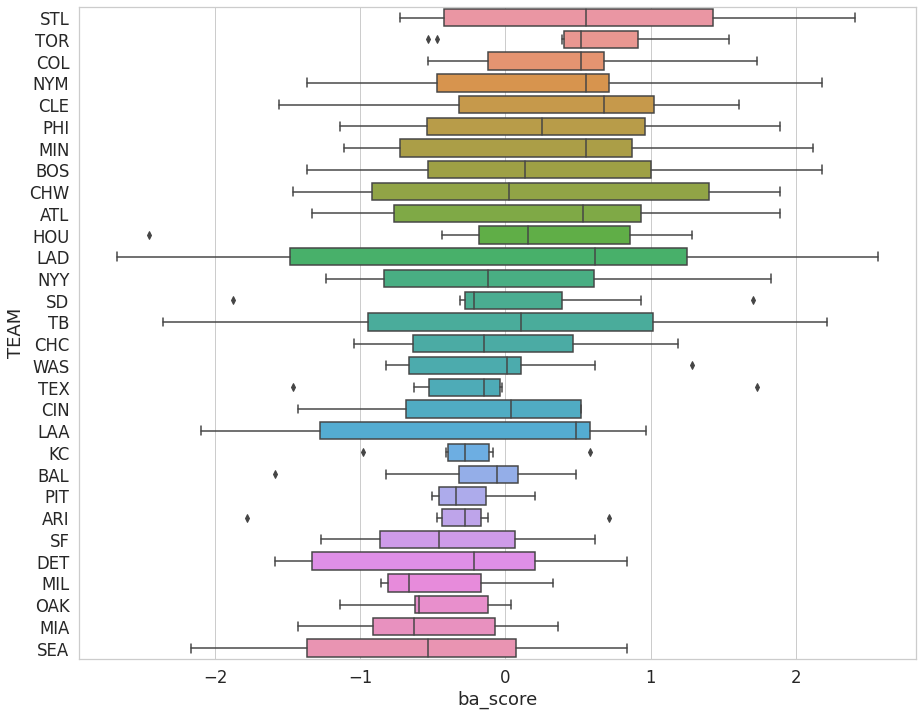

In [13]:
sns.set(rc={'figure.figsize':(15,12)}, font_scale=1.5, style='whitegrid')
order = batting_df.groupby(by=['TEAM'])['ba_score'].mean().sort_values(ascending=False).index
sns.boxplot(y=batting_df['TEAM'], 
            x=batting_df['ba_score'], 
            order=order)
plt.show()

In [14]:
b = batting_df[(batting_df['TEAM'] == "TOR") & (batting_df['ba_score'] < 0)].iloc[:,[0,1,6]]
b

,last_name,first_name,ba
51,Chapman,Matt,0.235
89,Merrifield,Whit,0.233


Outside of Chapman and Merrifield (two outliers above) we see a really small boxplot - a sign of depth in my books!

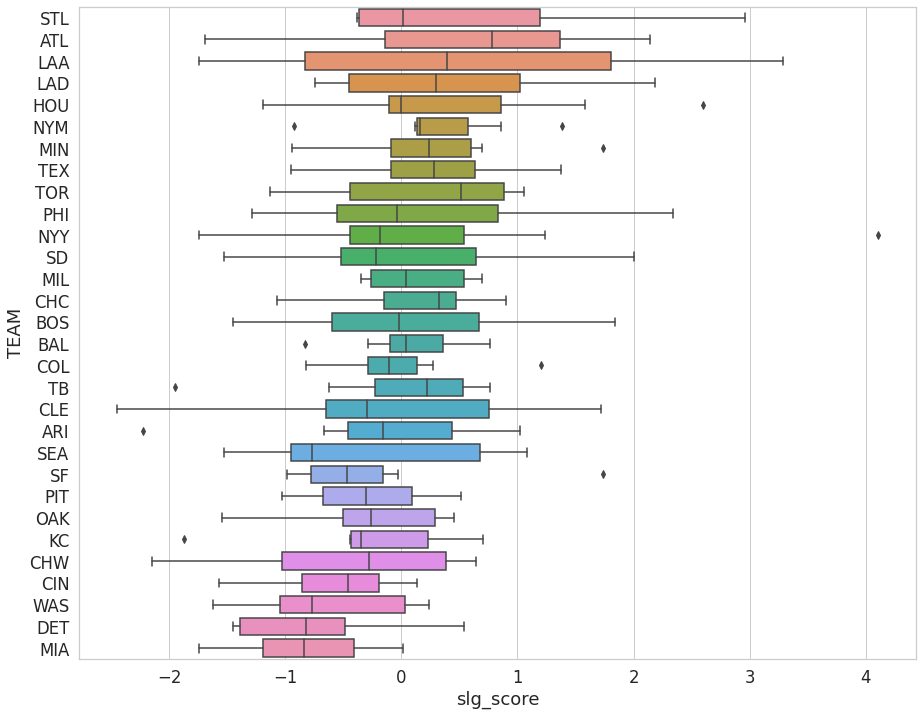

In [15]:
sns.set(rc={'figure.figsize':(15,12)}, font_scale=1.5, style='whitegrid')
order = batting_df.groupby(by=['TEAM'])['slg_score'].mean().sort_values(ascending=False).index
sns.boxplot(y=batting_df['TEAM'], 
            x=batting_df['slg_score'], 
            order=order)
plt.show()

In [16]:
#the ultimate outlier
j = batting_df[(batting_df['slg_score'] > 4)].iloc[:,[0,1,9]]
j

,last_name,first_name,slg
6,Judge,Aaron,0.683


Now let's move to pitching.

In [17]:
pitching_csv = data_dir + '/Pitching Stats.csv'

In [18]:
pitching_raw = pd.read_csv(pitching_csv)
pitching_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   last_name          779 non-null    object 
 1    first_name        779 non-null    object 
 2   player_id          779 non-null    int64  
 3   year               779 non-null    int64  
 4   p_formatted_ip     779 non-null    float64
 5   p_era              779 non-null    float64
 6   p_opp_batting_avg  779 non-null    float64
 7   Unnamed: 7         0 non-null      float64
dtypes: float64(4), int64(2), object(2)
memory usage: 48.8+ KB


In [19]:
pitching_raw = pitching_raw.where(pitching_raw['p_formatted_ip'] > 50)
pitching_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   last_name          293 non-null    object 
 1    first_name        293 non-null    object 
 2   player_id          293 non-null    float64
 3   year               293 non-null    float64
 4   p_formatted_ip     293 non-null    float64
 5   p_era              293 non-null    float64
 6   p_opp_batting_avg  293 non-null    float64
 7   Unnamed: 7         0 non-null      float64
dtypes: float64(6), object(2)
memory usage: 48.8+ KB


Doing the same join as I did in the batting dataset, but will need to drop an odd extra column this time.

In [20]:
del pitching_raw['Unnamed: 7']
pitching_df = pd.merge(pitching_raw, playerid_df, on='player_id')
pitching_df = pitching_df.dropna()
pitching_df.head()

,last_name,first_name,player_id,year,p_formatted_ip,p_era,p_opp_batting_avg,TEAM,LG
486,Wainwright,Adam,425794.0,2022.0,173.0,3.33,0.252,STL,NL
487,Greinke,Zack,425844.0,2022.0,114.2,4.00,0.286,KC,AL
488,Verlander,Justin,434378.0,2022.0,152.0,1.84,0.190,HOU,AL
489,Sanchez,Anibal,434671.0,2022.0,53.1,4.56,0.227,WAS,NL
490,Jansen,Kenley,445276.0,2022.0,53.0,3.91,0.204,ATL,NL


In [21]:
#calculate mean and standrad deviation for era and baa
baa_mean = pitching_df['p_opp_batting_avg'].mean()
baa_std = pitching_df['p_opp_batting_avg'].std()
print(baa_mean, baa_std)

0.23623076923076922 0.03651110133044457


In [22]:
era_mean = pitching_df['p_era'].mean()
era_std = pitching_df['p_era'].std()
print(era_mean, era_std)

3.7553479853479854 1.1777411579284502


In [23]:
#assign each player an std score
#has to be the opposite direction from batting as the lower the baa/era the better
pitching_df['baa_score'] = (baa_mean-pitching_df['p_opp_batting_avg'])/baa_std
pitching_df['era_score'] = (era_mean- pitching_df['p_era'])/era_std
pitching_df.head()

,last_name,first_name,player_id,year,p_formatted_ip,p_era,p_opp_batting_avg,TEAM,LG,baa_score,era_score
486,Wainwright,Adam,425794.0,2022.0,173.0,3.33,0.252,STL,NL,-0.431902,0.361156
487,Greinke,Zack,425844.0,2022.0,114.2,4.00,0.286,KC,AL,-1.363126,-0.207730
488,Verlander,Justin,434378.0,2022.0,152.0,1.84,0.190,HOU,AL,1.266211,1.626289
489,Sanchez,Anibal,434671.0,2022.0,53.1,4.56,0.227,WAS,NL,0.252821,-0.683216
490,Jansen,Kenley,445276.0,2022.0,53.0,3.91,0.204,ATL,NL,0.882766,-0.131312


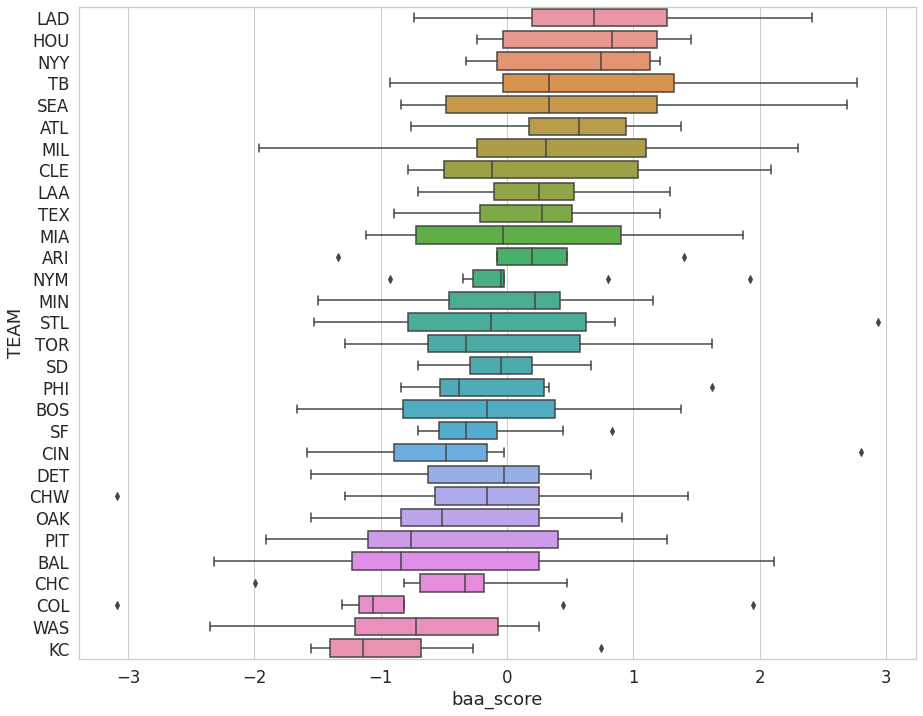

In [24]:
sns.set(rc={'figure.figsize':(15,12)}, font_scale=1.5, style='whitegrid')
order = pitching_df.groupby(by=['TEAM'])['baa_score'].mean().sort_values(ascending=False).index
sns.boxplot(y=pitching_df['TEAM'], 
            x=pitching_df['baa_score'], 
            order=order)
plt.show()

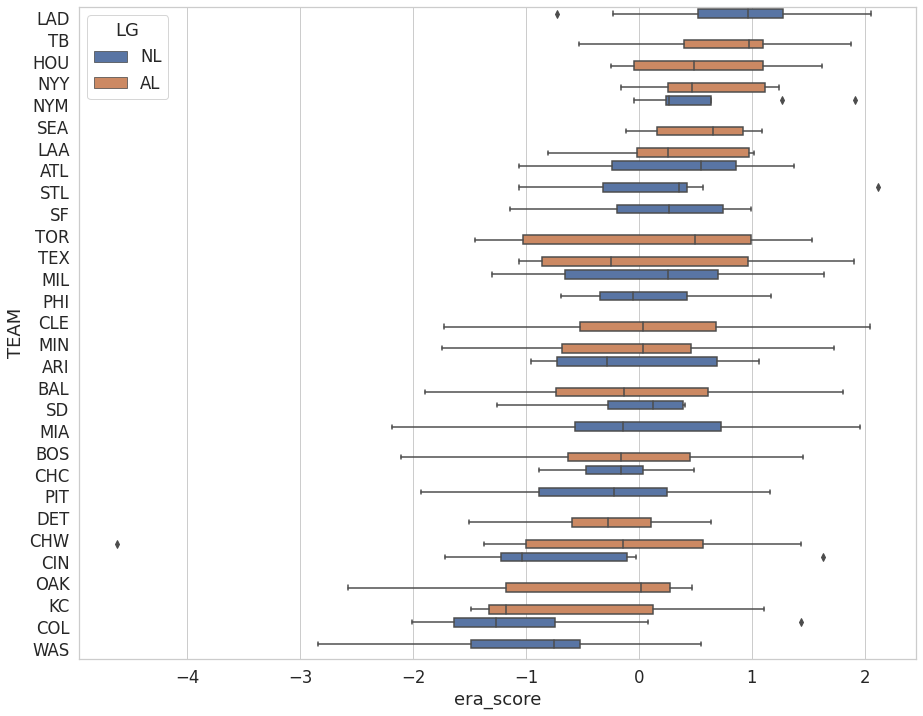

In [25]:
sns.set(rc={'figure.figsize':(15,12)}, font_scale=1.5, style='whitegrid')
order = pitching_df.groupby(by=['TEAM'])['era_score'].mean().sort_values(ascending=False).index
sns.boxplot(y=pitching_df['TEAM'], 
            x=pitching_df['era_score'], 
            order=order,
            hue=pitching_df['LG'])
plt.show()

We're more middle of the pack in this regard.

In [26]:
p = pitching_df[(pitching_df['TEAM'] == "TOR")].iloc[:,[0,1,4,5]]
p

,last_name,first_name,p_formatted_ip,p_era
502,Phelps,David,55.2,2.75
537,Stripling,Ross,113.0,3.03
538,Garcia,Yimi,52.2,2.39
552,Kikuchi,Yusei,92.1,5.46
554,Gausman,Kevin,152.1,3.31
591,Romano,Jordan,55.1,1.95
623,Berrios,Jose,152.2,5.07
665,Cimber,Adam,59.2,3.17
725,Manoah,Alek,171.0,2.42
746,White,Mitch,81.1,5.09
